<a href="https://colab.research.google.com/github/felmateos/predict-academic-success/blob/main/AcademicSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações do projeto

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

sns.set_theme(style="darkgrid")

# Importando  base de dados

### Base armazenada no mesmo repositório do GitHub que esse notebook


In [96]:
dataset_url = 'https://raw.githubusercontent.com/felmateos/predict-academic-success/main/dataset.csv'
df = pd.read_csv(dataset_url, sep=',', on_bad_lines='skip')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Analise preliminar

In [97]:
df.shape

(4424, 35)

In [98]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Pré-processamento

In [100]:
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [101]:
print(df.duplicated().sum())

0


In [102]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [103]:
df['Target'] = df['Target'].map({
    'Dropout':-1,
    'Enrolled':0,
    'Graduate':1
})

In [104]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [105]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,-1.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,-1.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


In [106]:
df.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Plotando

In [108]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [109]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

In [110]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [111]:
fig = px.box(df, y='Age at enrollment')
fig.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

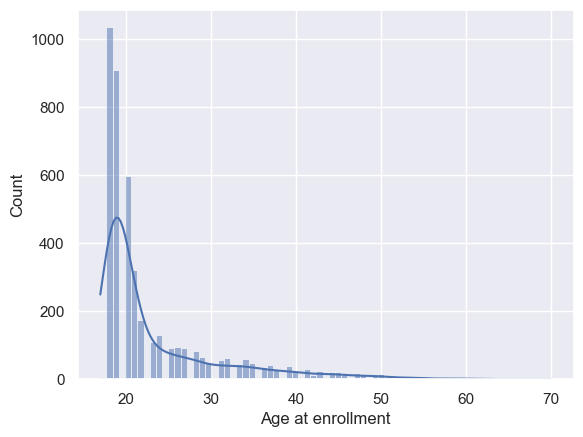

In [112]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df['Age at enrollment'], kde=True)

In [136]:
target_proportion = df['Target'].value_counts()

x = target_proportion.index
y = target_proportion.values

target_proportion = pd.DataFrame({
    'Target':x,
    'Count':y
})

fig = px.pie(target_proportion,
            names='Target', 
            values='Count',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])

fig.show()

c:\Users\felma\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Predição de sucesso acadêmico

## Seleção de atributos

In [236]:
X = df.iloc[:,0:34]
y = df.iloc[:,-1]

In [237]:
from sklearn.feature_selection import SelectKBest

features = 13

print(X.shape)
print(y.shape)

X = SelectKBest(k=features).fit_transform(X, y)

X = pd.DataFrame(X)
X.sample(10)



(4424, 34)
(4424,)


,0,1,2,3,4,5,6,7,8,9,10,11,12
1485,9.0,0.0,1.0,0.0,1.0,19.0,6.0,4.0,10.750000,6.0,11.0,5.0,11.500000
3553,15.0,1.0,1.0,1.0,0.0,20.0,5.0,5.0,16.500000,5.0,7.0,5.0,17.714286
3146,1.0,0.0,1.0,0.0,1.0,18.0,6.0,6.0,11.333333,6.0,8.0,6.0,11.333333
298,8.0,0.0,1.0,0.0,0.0,20.0,7.0,7.0,12.500000,8.0,8.0,8.0,13.137500
4251,1.0,0.0,1.0,0.0,0.0,20.0,5.0,2.0,10.000000,5.0,10.0,0.0,0.000000
3432,1.0,0.0,1.0,0.0,1.0,19.0,6.0,6.0,14.833333,6.0,6.0,6.0,14.666667
1852,1.0,0.0,1.0,1.0,0.0,19.0,5.0,5.0,12.600000,5.0,13.0,5.0,11.800000
1773,13.0,0.0,1.0,1.0,0.0,25.0,6.0,5.0,11.666667,6.0,11.0,4.0,12.000000
3652,8.0,0.0,1.0,0.0,1.0,18.0,7.0,7.0,13.300000,8.0,8.0,8.0,15.125000
2774,1.0,0.0,1.0,0.0,1.0,19.0,7.0,5.0,14.060000,7.0,9.0,7.0,11.242857


In [238]:
work_df = X.assign(Target = y)

work_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
1023,8.0,0.0,1.0,0.0,0.0,20.0,6.0,6.0,14.500000,6.0,7.0,6.0,13.500000,1
982,1.0,0.0,1.0,1.0,0.0,18.0,6.0,6.0,12.000000,6.0,6.0,6.0,12.500000,1
2113,1.0,1.0,1.0,0.0,0.0,20.0,6.0,6.0,10.666667,6.0,7.0,6.0,11.857143,1
1391,1.0,0.0,1.0,0.0,0.0,18.0,6.0,6.0,11.333333,6.0,8.0,5.0,12.600000,1
273,1.0,0.0,1.0,0.0,0.0,19.0,7.0,7.0,12.670000,8.0,8.0,8.0,13.550000,1
2061,8.0,0.0,1.0,0.0,1.0,19.0,7.0,7.0,13.385714,8.0,8.0,8.0,13.387500,1
1752,8.0,0.0,1.0,1.0,0.0,20.0,6.0,5.0,11.800000,6.0,9.0,4.0,12.000000,0
2645,1.0,0.0,1.0,1.0,0.0,22.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-1
3331,14.0,0.0,0.0,1.0,0.0,31.0,8.0,5.0,12.166667,7.0,12.0,5.0,12.000000,-1
176,12.0,0.0,1.0,0.0,0.0,27.0,6.0,5.0,13.200000,6.0,10.0,5.0,12.000000,1


In [239]:
work_df.corr()['Target']

0        -0.212025
1        -0.240999
2         0.409827
3        -0.229270
4         0.297595
5        -0.243438
6         0.155974
7         0.529123
8         0.485207
9         0.175847
10        0.092721
11        0.624157
12        0.566827
Target    1.000000
Name: Target, dtype: float64

In [240]:
X = work_df.iloc[:,0:features]
y = work_df.iloc[:,-1]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8.0,0.0,1.0,1.0,0.0,20.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,6.0,0.0,0.0,1.0,0.0,19.0,6.0,6.0,14.000000,6.0,6.0,6.0,13.666667
2,1.0,0.0,0.0,1.0,0.0,19.0,6.0,0.0,0.000000,6.0,0.0,0.0,0.000000
3,8.0,0.0,1.0,0.0,0.0,20.0,6.0,6.0,13.428571,6.0,10.0,5.0,12.400000
4,12.0,0.0,1.0,0.0,0.0,45.0,6.0,5.0,12.333333,6.0,6.0,6.0,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,0.0,1.0,1.0,0.0,19.0,6.0,5.0,13.600000,6.0,8.0,5.0,12.666667
4420,1.0,1.0,0.0,0.0,0.0,18.0,6.0,6.0,12.000000,6.0,6.0,2.0,11.000000
4421,1.0,0.0,1.0,0.0,1.0,30.0,7.0,7.0,14.912500,8.0,9.0,1.0,13.500000
4422,1.0,0.0,1.0,0.0,1.0,20.0,5.0,5.0,13.800000,5.0,6.0,5.0,12.000000


## Divisão de treino e teste
### Contém Target = {-1:"Dropout", 0: "Enrolled", 1:"Graduate"}

In [241]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [242]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 13)
(885, 13)
(3539,)
(885,)


## Usando Regressão Logistica

In [243]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=800)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Without scaling:", accuracy_score(y_pred, y_test))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("With scaling: ", scores.mean())

Without scaling: 0.7774011299435029
With scaling:  0.7615098990092989


## Usando KNN

In [244]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)

print("Without scaling: ", score)

Without scaling:  0.7175141242937854


### Usando Matriz de confusão para avaliar o modelo treinado usando KNN

[[0.65201465 0.17948718 0.16849817]
 [0.24503311 0.38410596 0.37086093]
 [0.05639913 0.07809111 0.86550976]]


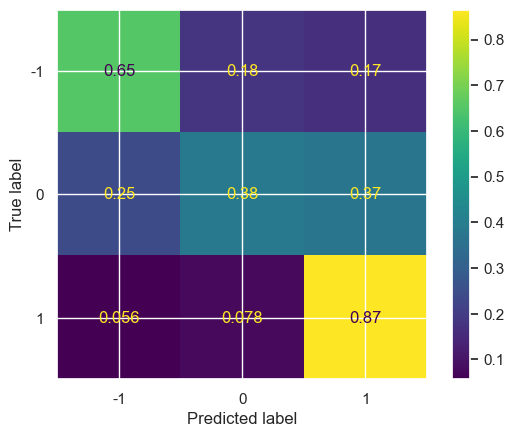

In [245]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true')

print(disp.confusion_matrix)

plt.show()

## Removendo Target = 0 (Enrolled), porque não tem movitvo para manter se vamos prever se a pessoa vai se graduar ou não

In [246]:
work_df = work_df[work_df['Target'] != 0]

### Separando o dataset restante em treino e teste

In [247]:
X = work_df.iloc[:,0:features]
y = work_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 13)
(726, 13)
(2904,)
(726,)


### Retreinando o modelo usando o novo dataset

In [248]:
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)

print("Without scaling: ", score)

Without scaling:  0.8581267217630854


### Avaliando novo modelo usando matriz de confusão

[[0.71985816 0.28014184]
 [0.05405405 0.94594595]]


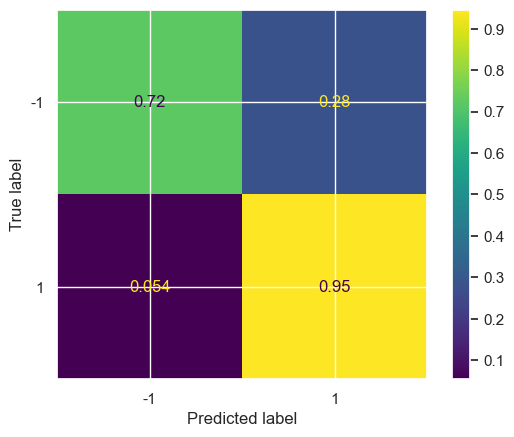

In [249]:
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true')

print(disp.confusion_matrix)

plt.show()